# Función sigmoide

## Distintas variantes

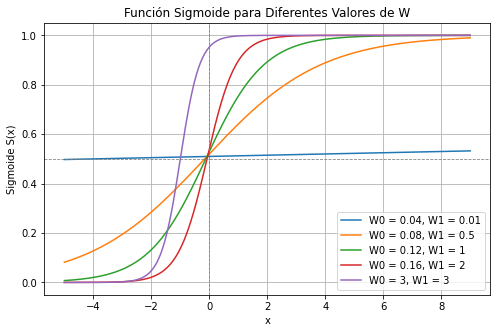

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Definir la función sigmoide con un parámetro de escala alpha
def sigmoid(x1, w0, w1):
    x0 = 1
    return 1 / (1 + np.exp((-1)*(w0*x0+w1*x1)))

def sigmoid_z(z):
    x0 = 1
    return 1 / (1 + np.exp((-1)*(z)))

# Valores de x
xs = np.linspace(-5, 9, 400)

# Diferentes valores de alpha para ver cómo cambia la pendiente
w1s = [0.01, 0.5, 1, 2, 3]
w0s = [0.04, 0.08, 0.12, 0.16, 3]
# Graficar la función sigmoide para diferentes valores de alpha
plt.figure(figsize=(8, 5))

for w0, w1 in zip(w0s, w1s):
    ys = sigmoid(xs, w0, w1)
    plt.plot(xs, ys, label=f'W0 = {w0}, W1 = {w1}')

# Configurar el gráfico
plt.axhline(0.5, color='gray', linestyle='--', linewidth=0.8)  # Línea guía en y=0.5
plt.axvline(0, color='gray', linestyle='--', linewidth=0.8)  # Línea guía en x=0
plt.xlabel("x")
plt.ylabel("Sigmoide S(x)")
plt.title("Función Sigmoide para Diferentes Valores de W")
plt.legend()
plt.grid()

# Mostrar el gráfico
plt.show()

## Intuición para una sola variable z = x1w1+x0w0

### Perceptrón

Función de activación lineal: y_pred=fi(z) = { 1 z>=0, 0 cualquier otro valor. }

In [6]:
import pandas as pd
df = pd.DataFrame({'edad': [1,2,3,5,6,7], 'glucosa':[2,3,4,6,7,8], 'target': [1,1,1,0,0,0]})
df

,edad,glucosa,target
0,1,2,1
1,2,3,1
2,3,4,1
3,5,6,0
4,6,7,0
5,7,8,0


In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Perceptron
X = df[['edad']]
y = df['target']
clf = Perceptron(random_state=0)
clf.fit(X, y)
print(clf.coef_, clf.intercept_)


[[-1.]] [4.]


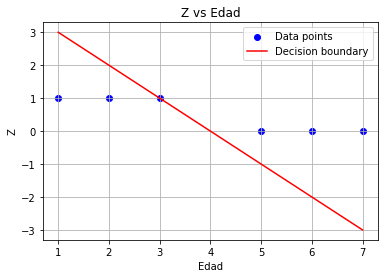

In [8]:
# Plot the data points
plt.scatter(X, y, color='blue', label='Data points')

# Calculate the decision boundary line
x_values = np.linspace(X.min(), X.max(), 100)
y_values = clf.coef_[0] * x_values + clf.intercept_

# Plot the decision boundary line
plt.plot(x_values, y_values, color='red', label='Decision boundary')

# Configure the plot
plt.xlabel('Edad')
plt.ylabel('Z')
plt.title('Z vs Edad')
plt.legend()
plt.grid()

# Show the plot
plt.show()

Observo que si la edad es 1 entonces Z=3, Z>0 y entonces si edad 1=>enfermedad. Por otro lado si edad 5 entonces Z=-1, clasifico como 0=>No enfermedad. (No confundir el plot con un decision boundary, solo hay un x que es la edad)

----

A veces puede resultar mas valiosa un propensión mas que un valor exacto. Modificando la función de activación por la función sigmoide podemos lograrlo.

In [9]:
X = df[['edad']]
y = df['target']
clf = LogisticRegression(random_state=0)
clf.fit(X, y)
print(clf.coef_, clf.intercept_)

[[-1.10439993]] [4.41762958]


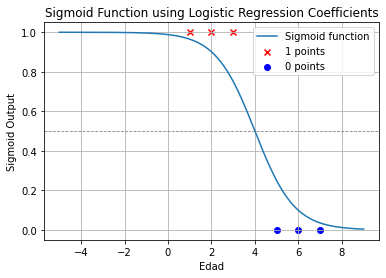

In [10]:
# Calculate the z values using the coefficients and intercept
z_values = clf.coef_[0] * xs + clf.intercept_

# Calculate the sigmoid values
sigmoid_values = sigmoid_z(z_values)

# Plot the sigmoid function
plt.plot(xs, sigmoid_values, label='Sigmoid function')
plt.axhline(y=0.5, color='gray', linestyle='--', linewidth=0.8)
# Plot the data points
plt.scatter(X[y==1], y[y==1], color='red', marker="x", label='1 points')
plt.scatter(X[y==0], y[y==0], color='blue', label='0 points')

# Configure the plot
plt.xlabel('Edad')
plt.ylabel('Sigmoid Output')
plt.title('Sigmoid Function using Logistic Regression Coefficients')
plt.legend()
plt.grid()

# Show the plot
plt.show()

## Intuición para dos variables z = x2w2+x1w1+x0w0

Ahora la clase de interes depende de tener pocos años y mucha glucosa.

In [4]:
df = pd.DataFrame({'edad':   [1,2,3,1,2,3,1,12,13,14,10,12,13], 
                   'glucosa':[9,9,9,9,8,1,9,9,1,9,1,9,9], 
                   'target': [1,1,1,1,1,0,0,0,0,0,0,0,0]})

In [11]:
X = df[['edad', 'glucosa']]
y = df['target']
clf = Perceptron(random_state=0)
clf.fit(X, y)
print(clf.coef_, clf.intercept_)

[[-4.  2.]] [6.]


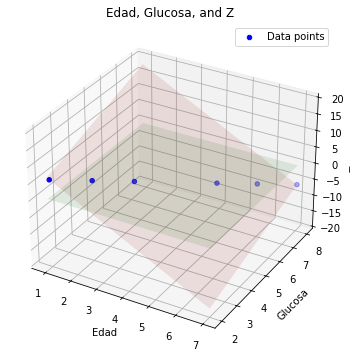

In [ ]:
# Create a 3D plot
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
zs = clf.coef_[0][0] * df['edad'] + clf.coef_[0][1] * df['glucosa'] + clf.intercept_

# Plot the data points
ax.scatter(df['edad'], df['glucosa'], zs, color='blue', label='Data points')

# Create a meshgrid for the plane
edad_range = np.linspace(df['edad'].min()-df['edad'].min()*0.1, df['edad'].max(), 10)
glucosa_range = np.linspace(df['glucosa'].min()-df['glucosa'].min()*0.1, df['glucosa'].max(), 10)
edad_grid, glucosa_grid = np.meshgrid(edad_range, glucosa_range)
z_grid = clf.coef_[0][0] * edad_grid + clf.coef_[0][1] * glucosa_grid + clf.intercept_

# Plot the decision boundary plane
ax.plot_surface(edad_grid, glucosa_grid, z_grid, alpha=0.1, color='red')

# Add a surface at z=0
z_zero = np.zeros_like(edad_grid)
ax.plot_surface(edad_grid, glucosa_grid, z_zero, alpha=0.1, color='green')

# Configure the plot
ax.set_xlabel('Edad')
ax.set_ylabel('Glucosa')
ax.set_zlabel('Target')
ax.set_title('Edad, Glucosa, and Z')
ax.legend()

# Show the plot
plt.show()